In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,Age,Income,Credit_Score,Employment_Years,Existing_Loan,Property_Value,Loan_Amount
0,59,70015,653,5,60566,2144027,103259
1,49,74268,803,9,66703,4966500,216672
2,35,38141,776,12,27192,1591267,93642
3,28,91910,661,1,1062,1297562,99196
4,41,76044,648,1,84076,4648693,195219


In [4]:
df.shape

(120, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               120 non-null    int64
 1   Income            120 non-null    int64
 2   Credit_Score      120 non-null    int64
 3   Employment_Years  120 non-null    int64
 4   Existing_Loan     120 non-null    int64
 5   Property_Value    120 non-null    int64
 6   Loan_Amount       120 non-null    int64
dtypes: int64(7)
memory usage: 6.7 KB


In [6]:
df.describe()

,Age,Income,Credit_Score,Employment_Years,Existing_Loan,Property_Value,Loan_Amount
count,120.000000,120.000000,120.0000,120.000000,120.000000,1.200000e+02,120.000000
mean,39.516667,58913.350000,700.8000,9.858333,48625.500000,2.925556e+06,139253.650000
std,11.352994,22640.734731,85.2194,5.848645,29099.571239,1.268192e+06,40864.986999
min,21.000000,20854.000000,553.0000,1.000000,1062.000000,8.004040e+05,62880.000000
25%,29.000000,40234.250000,643.2500,4.000000,23897.750000,1.952538e+06,102917.750000
50%,40.500000,60745.500000,702.0000,10.000000,43589.500000,2.777268e+06,138865.500000
75%,48.000000,78299.750000,772.7500,16.000000,74979.750000,4.066261e+06,173404.750000
max,59.000000,97371.000000,848.0000,19.000000,99835.000000,4.993398e+06,222773.000000


In [7]:
df.isnull().sum()

Age                 0
Income              0
Credit_Score        0
Employment_Years    0
Existing_Loan       0
Property_Value      0
Loan_Amount         0
dtype: int64

In [8]:
X = df.drop("Loan_Amount", axis=1)
y = df["Loan_Amount"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 10016.090528972216
MSE: 128338505.20628758
RMSE: 11328.658579297355
R2 Score: 0.9418918220358804


In [13]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients

,Feature,Coefficient
0,Age,-24.229888
1,Income,0.217654
2,Credit_Score,52.873603
3,Employment_Years,-122.372943
4,Existing_Loan,-0.088470
5,Property_Value,0.029462


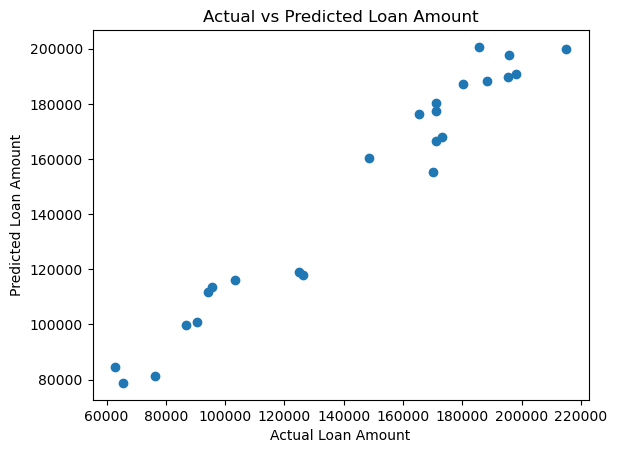

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("Actual vs Predicted Loan Amount")
plt.show()

In [16]:
new_customer = pd.DataFrame({
    "Age": [35],
    "Income": [60000],
    "Credit_Score": [750],
    "Employment_Years": [8],
    "Existing_Loan": [200000],
    "Property_Value": [4000000]
})

predicted_loan = model.predict(new_customer)
print(f"predected amount by ML model{predicted_loan}")

predected amount by ML model[161595.21516559]
